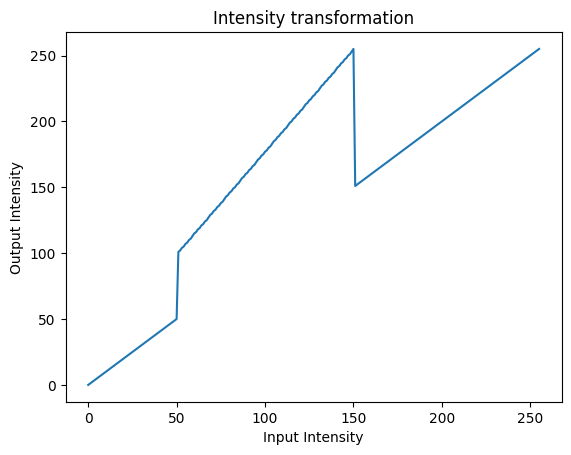

Text(0.5, 1.0, 'After transformation')

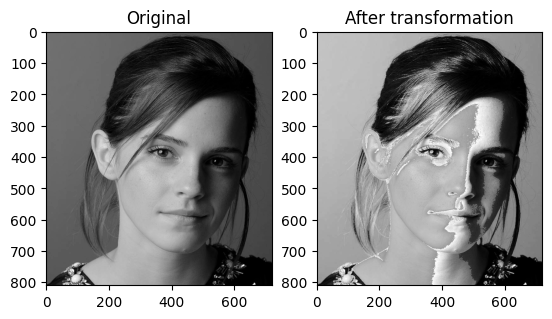

In [2]:
#Question 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
c = np.array([(50,100),(150,255)])
t1 = np.linspace(0, c[0,0], c[0,0] + 1 ).astype('uint8')
t2 = np.linspace(c[0,1]+1, c[1,1],c[0,1] ).astype('uint8')
t3 = np.linspace(c[1,0] + 1, c[1,1], c[1,1]-150).astype('uint8')
tr1=np.concatenate((t1,t2),axis=0).astype('uint8')
tr2=np.concatenate((tr1,t3),axis=0).astype('uint8')
plt.plot(tr2)
plt.title('Intensity transformation')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.show()

img=cv.imread('emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

img2=tr2[img]
fig,ax=plt.subplots(1,2)
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img2,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('After transformation')

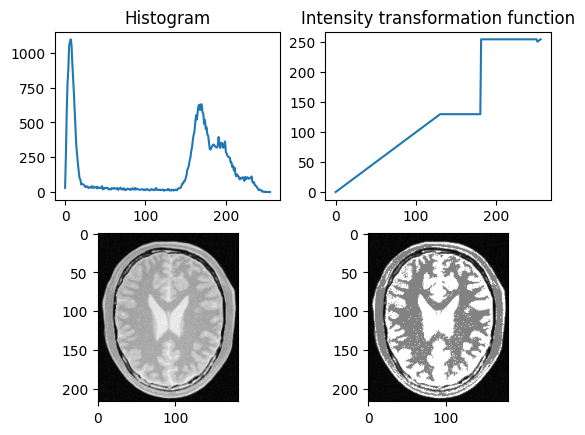

In [73]:
#Question 2

img=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None
hist= cv.calcHist([img],[0], None, [256], [0,256])

t1=np.ones(70,dtype=np.uint8)*255
t2=np.ones(50,dtype=np.uint8)*130
t3=np.arange(251,256,1,dtype=np.uint8)
t4=np.arange(0,131,dtype=np.uint8)
t5=np.concatenate((t4,t2),axis=0,dtype=np.uint8)
t6=np.concatenate((t5,t1),axis=0,dtype=np.uint8)
t7=np.concatenate((t6,t3),axis=0,dtype=np.uint8)

img2=t7[img]

plt.subplot(2,2,1)
plt.plot(hist)
plt.title('Histogram')

plt.subplot(2,2,2)
plt.plot(t7)
plt.title('Intensity transformation function')

plt.subplot(2,2,3)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)

plt.subplot(2,2,4)
plt.imshow(img2,cmap='gray',vmin=0,vmax=255)

plt.show()


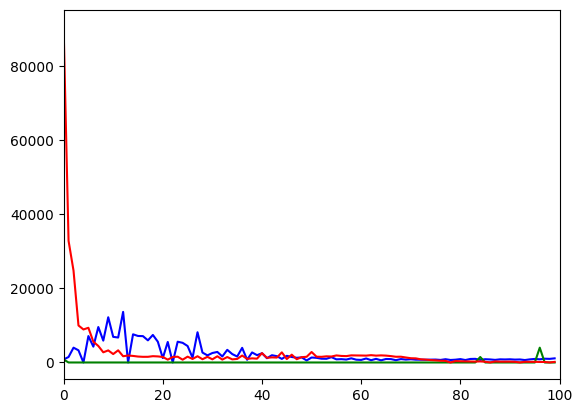

In [98]:
#Question 3

img=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img is not None
img2=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img3=cv.cvtColor(img2,cv.COLOR_RGB2Lab)

img4=img3[:,:,0]
gamma1=0.2
gamma2=2

t1=np.array([(i/255)**gamma1*255 for i in range(256)]).astype(np.uint8)
t2=np.array([(i/255)**gamma2*255 for i in range(256)]).astype(np.uint8)

img_g1=t1[img4]
img_g2=t2[img4]


hist_L1= cv.calcHist([img4], [0], None, [100], [0,100])
hist_L2= cv.calcHist([img_g1], [0], None, [100], [0,100])
hist_L3= cv.calcHist([img_g2], [0], None, [100], [0,100])

plt.plot(hist_L1,'b')
plt.plot(hist_L2,'g')
plt.plot(hist_L3,'r')
plt.xlim([0,100])
plt.show()

cv.namedWindow('display',cv.WINDOW_NORMAL)
cv.imshow('display',img4) #Displaying using open cv
cv.waitKey()
cv.imshow('display',img_g1) #Displaying using open cv
cv.waitKey()
cv.imshow('display',img_g2) #Displaying using open cv
cv.waitKey()
cv.destroyAllWindows()

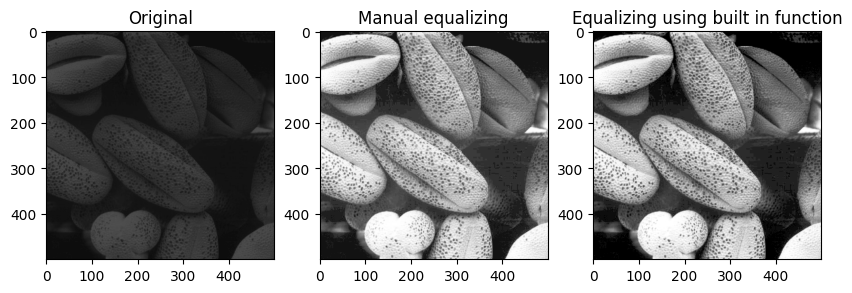

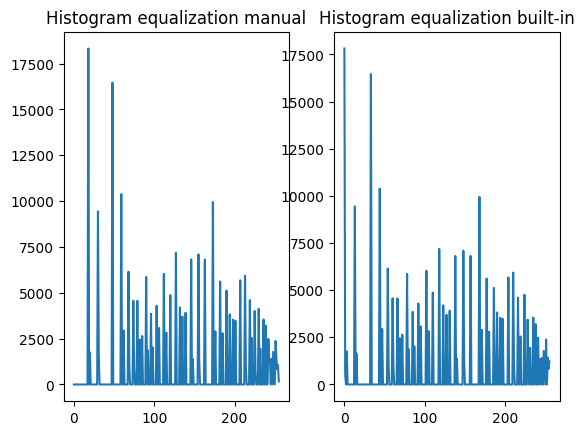

In [69]:
#Question 4
img=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
assert img is not None
hist1=cv.calcHist([img],[0],None,[256],[0,256])
t1=[]
mn=sum(hist1)
L_1=len(hist1)-1
for i in range(256):
    s=sum(hist1[:i+1])
    b=(L_1/mn)*s[0]
    c=np.round(b[0],1)
    t1.append(c)

t2=np.array(t1).astype(np.uint8)
img2=t2[img]

eq=cv.equalizeHist(img)

fig,ax=plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(img2,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Manual equalizing')
ax[2].imshow(eq,cmap='gray',vmin=0,vmax=255)
ax[2].set_title('Equalizing using built in function')
plt.show()

hist2= cv.calcHist([img2], [0], None, [256], [0,256])
hist3= cv.calcHist([eq], [0], None, [256], [0,256])
plt.subplot(1, 2, 1)
plt.plot(hist2)
plt.title('Histogram equalization manual')

plt.subplot(1, 2, 2)
plt.plot(hist3)
plt.title('Histogram equalization built-in')

plt.show()



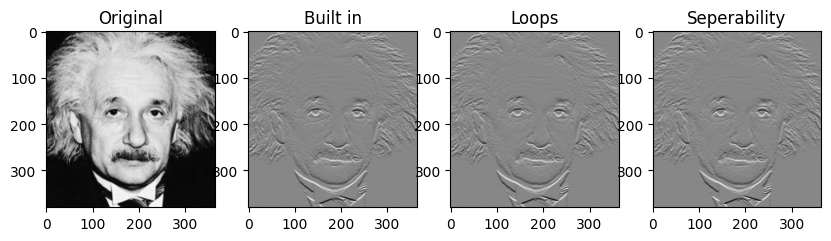

In [206]:
#Question 6
img=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
img2=cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX) # Converting to a float image in [0,1]
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
res_v=cv.filter2D(img2,-1,sobel_v)
res_v=cv.normalize(res_v,res_v,0,255,cv.NORM_MINMAX,dtype=cv.CV_32F)

assert sobel_v.shape[0]%2==1 and sobel_v.shape[1]%2==1 #Ensuring kernal shape is odd
k_hw,k_hh=sobel_v.shape[0]//2,sobel_v.shape[1]//2

h,w=img.shape
results=np.zeros(img.shape,np.float32)
for m in range(k_hh,h-k_hh):
    for n in range(k_hw,w-k_hw):
        results[m,n]=np.dot(img[m-k_hw:m+k_hw+1,n-k_hh:n+k_hh+1].flatten(),sobel_v.flatten()) #Dot product for the inner two for loops 
k1=np.array([[1],[2],[1]],np.float32)
k2=np.array([-1,0,1],np.float32)
seperate=cv.sepFilter2D(img2,-1,k1,k2)

fig,ax=plt.subplots(1,4,figsize=(10,15))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[1].imshow(res_v,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Built in')
ax[2].imshow(results,cmap='gray')
ax[2].set_title('Loops')
ax[3].imshow(seperate,cmap='gray')
ax[3].set_title('Seperability')
plt.show()

In [4]:
#Question 5, Nearest neighbours
im=cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
scale=3
rows=int(im.shape[0]*scale)
cols=int(im.shape[1]*scale)
zoomed=np.zeros((rows,cols),dtype=im.dtype)

for i in range(0,rows):
    for j in range(0,cols):
        zoomed[i,j]=im[int(i/scale),int(j/scale)] 

cv.namedWindow('display',cv.WINDOW_AUTOSIZE)
cv.imshow('display',im) #Displaying using open cv
cv.waitKey()
cv.imshow('display',zoomed) #Displaying using open cv
cv.waitKey()
cv.destroyAllWindows()

In [3]:
#Question 5, Bilinear interpolation
im=cv.imread('im03small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None
scale=3
rows=int(im.shape[0]*scale)
cols=int(im.shape[1]*scale)
zoomed=np.zeros((rows,cols),dtype=im.dtype)
for i in range(0,rows):
    for j in range(0,cols):
        x1,y1=int(i/scale),int(j/scale)
        x2,y2=i/scale,j/scale
        if x1==im.shape[0]-1 or y1==im.shape[1]-1:
            g=im[x1,y1]
        else:
            a,b,c,d=im[x1,y1],im[x1,y1+1],im[x1+1,y1+1],im[x1+1,y1]
            dx=x2-x1
            dy=y2-y1
            e=a*(1-dx)+d*dx
            f=b*(1-dx)+c*dx
            g=e*(1-dy)+f*dy
            zoomed[i,j]=g

cv.namedWindow('display',cv.WINDOW_AUTOSIZE)
cv.imshow('display',im) #Displaying using open cv
cv.waitKey()
cv.imshow('display',zoomed) #Displaying using open cv
cv.waitKey()
cv.destroyAllWindows()

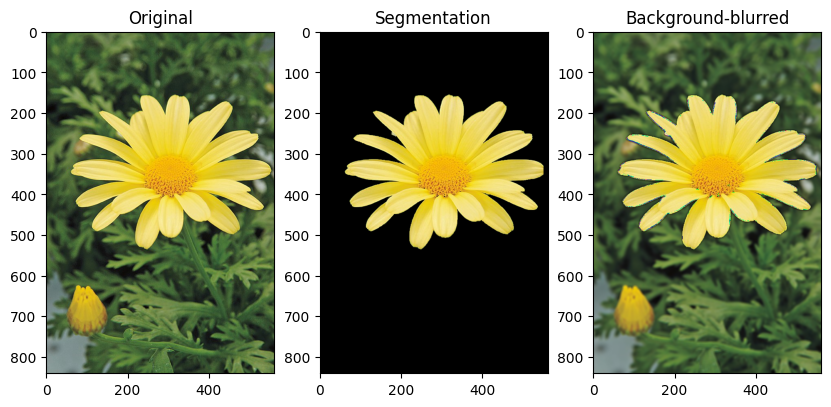

In [72]:
#Question 7

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = cv.imread('daisy.jpg',cv.IMREAD_COLOR)
image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
   
mask = np.zeros(image.shape[:2], np.uint8)

backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
rectangle = (50, 150, 500, 400)
   
new_mask, fg, bg=cv.grabCut(image, mask, rectangle,  
            backgroundModel, foregroundModel,
            3, cv.GC_INIT_WITH_RECT)
   

mask2 = np.where((new_mask == 2)|(new_mask == 0), 0, 1).astype('uint8')
mask3 = np.where((new_mask == 1)|(new_mask == 3), 0, 1).astype('uint8')

image2 = image * mask2[:, :, np.newaxis]
image3 = image * mask3[:, :, np.newaxis]

gaus=cv.getGaussianKernel(7,4)
smooth=cv.sepFilter2D(image3,-1,gaus,gaus)
image4=image2+smooth

fig,ax=plt.subplots(1,3,figsize=(10,15))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[1].imshow(image2)
ax[1].set_title('Segmentation')
ax[2].imshow(image4)
ax[2].set_title('Background-blurred')

plt.show()